<a href="https://colab.research.google.com/github/Bologna-Internship/Autoencoder-for-Anomaly-Detection/blob/main/Preliminary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bologna Internship Preliminary - Code

## Furkan Atasoy and Zehranaz Canfes

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')

# Data Pre-processing





In [ ]:
def data_fetch(mode="one-node", node_name="", n=50): # specify a node name or speficy number of nodes you want to process
  base_path = "/content/drive/MyDrive/CMPE/Bologna-Internship/new_data/"

  if mode == "one-node":
    df_dict[node_name] = pd.read_parquet(base_path+node_name)
  
  elif mode == "multiple-node":
    filenames = os.listdir(base_path)
    df_dict = {}

    for filename in filenames[:n]:
      df_dict[filename] = pd.read_parquet(base_path+filename)
  
  return df_dict

In [ ]:
# Read all the data
df_dict = data_fetch(mode="multiple-node", n=50)

In [ ]:
# Merge consecutive rows with same label
def merge_consecutive_rows(df, mode="simple"):
  prev_state = -1
  start, end = 0, 0
  merged_data = []
  for i, row in enumerate(df.to_numpy()): 
    if row[-1] == 2:
      if prev_state != 2:
        end = i
      
        new_row = helper_create_new_row(df, start, end, 0, mode)
        merged_data.append(new_row)

        start = i
      prev_state = 2
    if row[-1] == 0:
      if prev_state != 0:
        end = i

        new_row = helper_create_new_row(df, start, end, 2, mode)
        merged_data.append(new_row)      

        start = i
      prev_state = 0
    
  return pd.DataFrame(merged_data[1:])

def helper_create_new_row(df, start, end, label, mode):
  df_interval = df[start:end]
  new_row = {}
  if mode == "detailed":
    new_row = df_interval.mean()
  else:
    new_row["New_label"] = label

  new_row["start_timestamp"] = df.iloc[start]['timestamp']
  new_row["end_timestamp"] = df.iloc[end]['timestamp']
  new_row["interval_length"] = end - start 
  return new_row

In [ ]:
# Create merged dataframes
df_dict_merged = {}
for filename in df_dict:
  df_merged = merge_consecutive_rows(df_dict[filename])
  df_dict_merged[filename] = df_merged

# 1. Input Analysis

In [ ]:
# Select a df to work on
df = df_dict['r207n02.gzip']

In [ ]:
# See data between time intervals
def filter_df_by_time(df, start_date, end_date):
  return df[df["timestamp"].between(pd.Timestamp(start_date), 
                                  pd.Timestamp(end_date))][['timestamp', 'New_label']]

## 1.1. Plot of Labels According to Time

Text(0.5, 0, 'Timestamp')

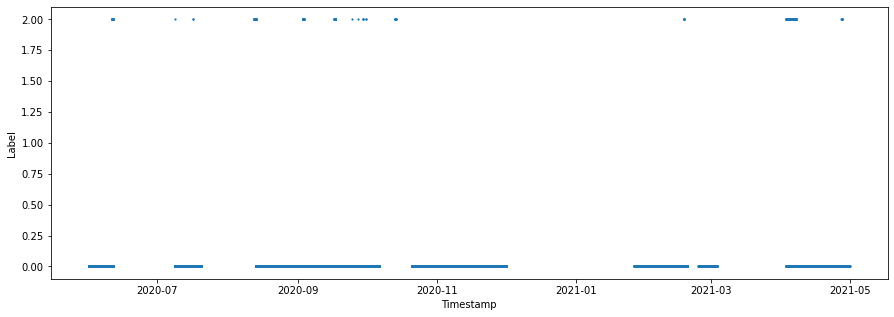

In [ ]:
# Plot label according to time
x = df["timestamp"]
y = df["New_label"]
plt.figure(figsize=(15,5))
plt.scatter(x,y, linewidths=0.001, s=5)
plt.ylabel('Label')
plt.xlabel('Timestamp')

In [ ]:
# Plot all labels according to time
fig, axes = plt.subplots(len(df_dict), figsize=(40,100))
for i, filename in enumerate(df_dict):
  df = df_dict[filename]
  df = filter_df_by_time(df, '2020-06-01 00:00:00', '2021-04-01 04:00:00')
  labels = df["New_label"].to_numpy()
  axes[i].set_ylabel(filename)
  axes[i].scatter(range(0,len(labels)), labels, s=2)

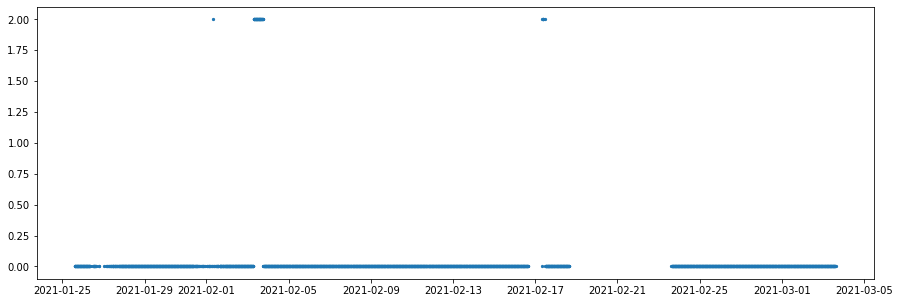

In [ ]:
# Plot data between a time interval
def plot_data_between_time_interval(df, start_date, end_date):
  mask = (df['timestamp'] <=  pd.Timestamp(end_date)) & (df['timestamp'] >=  pd.Timestamp(start_date))
  df2 = df.loc[mask]
  plt.figure(figsize=(15,5))
  plt.scatter(df2['timestamp'], df2['New_label'], s=5)

plot_data_between_time_interval(df, '2021-01-25 14:15:00',	'2021-04-03 02:55:00')

## 1.2. Ratio of the anomalies

In [ ]:
# Calculate the proportion of the time of anomalies
ratios_dict = {}
for filename in df_dict:
  df = df_dict[filename]
  df = filter_df_by_time(df, '2020-06-01 00:00:00', '2021-04-01 04:00:00')
  ratio = len(df[df["New_label"] == 2]) / len(df)
  ratios_dict[filename] = ratio

print("Ratios:",ratios_dict)
print("Mean of Ratios:", np.mean([*ratios_dict.values()]))

Ratios: {'r207n17.gzip': 0.0051148677936714345, 'r207n11.gzip': 0.004680998613037448, 'r205n13.gzip': 0.08938924093299178, 'r210n04.gzip': 0.011638185032410136, 'r211n05.gzip': 0.006448047162859248, 'r206n17.gzip': 0.009163312494647597, 'r208n09.gzip': 0.00432780847145488, 'r211n08.gzip': 0.02883233279783546, 'r208n10.gzip': 0.003341433778857837, 'r212n07.gzip': 0.004607021100156638, 'r207n02.gzip': 0.014049955396966993, 'r211n01.gzip': 0.006617647058823529, 'r206n03.gzip': 0.06476838079048024, 'r210n01.gzip': 0.20293301625049545, 'r208n14.gzip': 0.009558649988199197, 'r209n20.gzip': 0.21988694013625162, 'r206n18.gzip': 0.008807935693518043, 'r207n14.gzip': 0.02228541198254199, 'r206n09.gzip': 0.02085340674466621, 'r207n19.gzip': 0.004698512137823023, 'r211n17.gzip': 0.026143790849673203, 'r206n02 2.gzip': 0.08422125451681646, 'r210n14.gzip': 0.010679432885288161, 'r209n15.gzip': 0.010224760501105379, 'r211n14.gzip': 0.004138311568879897, 'r210n11.gzip': 0.005891558501334806, 'r208n16.

In [ ]:
pd.DataFrame(ratios_dict, index=[0])

,r207n17.gzip,r207n11.gzip,r205n13.gzip,r210n04.gzip,r211n05.gzip,r206n17.gzip,r208n09.gzip,r211n08.gzip,r208n10.gzip,r212n07.gzip,r207n02.gzip,r211n01.gzip,r206n03.gzip,r210n01.gzip,r208n14.gzip,r209n20.gzip,r206n18.gzip,r207n14.gzip,r206n09.gzip,r207n19.gzip,r211n17.gzip,r206n02 2.gzip,r210n14.gzip,r209n15.gzip,r211n14.gzip,r210n11.gzip,r208n16.gzip,r210n06.gzip,r206n02 3.gzip,r207n05.gzip,r207n03.gzip,r206n05.gzip,r209n13.gzip,r205n19.gzip,r205n14.gzip,r206n02.gzip,r205n12.gzip,r209n06.gzip,r212n17.gzip,r210n15.gzip,r221n05.gzip,r233n14.gzip,r223n17.gzip,r234n10.gzip,r232n05.gzip,r214n09.gzip,r231n18.gzip,r227n07.gzip,r217n01.gzip,r234n11.gzip
0,0.005115,0.004681,0.089389,0.011638,0.006448,0.009163,0.004328,0.028832,0.003341,0.004607,0.01405,0.006618,0.064768,0.202933,0.009559,0.219887,0.008808,0.022285,0.020853,0.004699,0.026144,0.084221,0.010679,0.010225,0.004138,0.005892,0.021329,0.011498,0.084221,0.003693,0.003783,0.019837,0.083911,0.16783,0.01328,0.084221,0.013535,0.013484,0.004154,0.019351,0.079535,0.030416,0.489024,0.00474,0.004411,0.003753,0.005503,0.011541,0.104962,0.56123


Text(0.5, 0, 'Ratio')

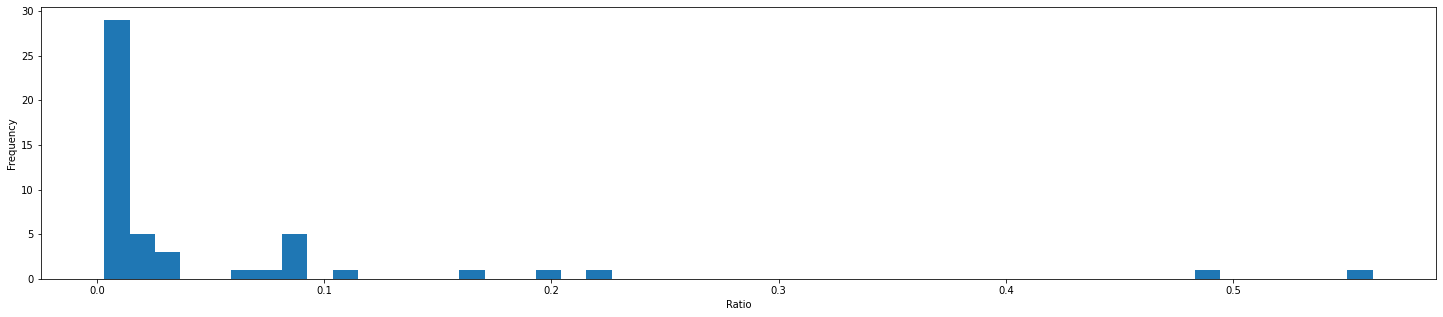

In [ ]:
# Histogram of ratios
ratios = [*ratios_dict.values()]

plt.figure(figsize=(25,5))
plt.hist(ratios, bins=50)

plt.ylabel('Frequency')
plt.xlabel('Ratio')

## 1.3. Interarrival Distribution of Anomalies

In [ ]:
# interarrivals of anomalies
def interarrival_calculate(df):
  prev = False
  interarrivals = []

  for index, row in df.iterrows():
    if row['New_label'] == 0:
        time_coeff = row['interval_length']
        if not prev:
          interarrivals.append(0) # initial interarrival of an anomaly
        else:
          interarrivals.append(900 * time_coeff) # Difference between the two start points of two different anomalies
        prev = True
  if interarrivals != []:
    interarrivals = interarrivals[1:] if interarrivals[0] == 0 else interarrivals
  return interarrivals

In [ ]:
# Filter Interarrivals
def filter_interarrivals(interarrivals, below_limit=0, upper_limit=1000000000):
  filtered_interarrivals = [x for x in interarrivals if below_limit < x < upper_limit]
  return filtered_interarrivals

In [ ]:
# Plot the interarrivals of each anomalies (consecutive anomalies are assumed to be the same anomaly i.e. dependent)
def plot_hist_for_interarrivals(interarrivals):
  observed_values, bin_edges, _ = plt.hist(interarrivals)
  plt.xlabel('Interarrival (second)')
  plt.ylabel('Frequency')
  return observed_values, bin_edges

In [ ]:
# Kolmogorov smirnov test
def do_kstest(interarrivals, alternative="two-sided"):
  # print(stats.expon.fit(interarrivals))
  return stats.kstest(rvs=interarrivals, cdf='expon', args=stats.expon.fit(interarrivals), alternative=alternative)

In [ ]:
# Chi-square test
def do_chisquare_test(interarrivals, observed_values, bin_edges, is_merge=False):
  # print(interarrivals, observed_values, bin_edges)
  # Find Expected values of exponential distribution for Chi-square test
  loc, scale = stats.expon.fit(interarrivals)
  n = len(interarrivals)
  expected_values = []
  for i, start_bin in enumerate(bin_edges[:-1]):
    end_bin = bin_edges[i+1]
    expected = (stats.expon.cdf(end_bin, loc, scale) - stats.expon.cdf(start_bin, loc, scale))*n
    expected_values.append(expected)


  # Merge cells less than 5 until all cels are bigger than or equal to 5
  if not is_merge:
    return stats.chisquare(observed_values, expected_values, ddof=1)
  else:
    merged_observed = []
    merged_expected = []
    curr_val = observed_values[0]
    curr_exp = expected_values[0]

    for i, next_val in enumerate(observed_values[1:]):
      if curr_val >= 5:
        merged_observed.append(curr_val)
        merged_expected.append(curr_exp)
        curr_val = next_val
        curr_exp = expected_values[i+1]
      else:
        curr_val += next_val
        curr_exp += expected_values[i+1]
    if curr_val - observed_values[-1] < 5:
      merged_observed.append(curr_val)
      merged_expected.append(curr_exp)
    elif curr_val < 5:
      merged_observed[-1] += curr_val
      merged_expected[-1] += curr_exp    

    return stats.chisquare(merged_observed, merged_expected, ddof=1)

In [ ]:
# Create interarrivals dict
interarrivals_dict = {}

for filename in df_dict_merged:
  # df = filter_df_by_time(df_dict[filename],"2020-07-16 19:30:00" ,"2021-04-03 04:00:00")
  # df_merged = merge_consecutive_rows(df)
  interarrivals_dict[filename] = interarrival_calculate(df_dict_merged[filename])

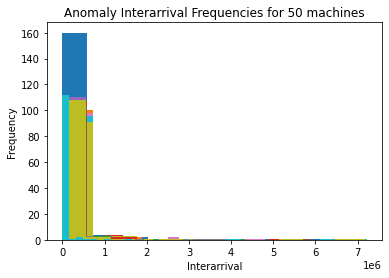

In [ ]:
result_dict = {}
for filename in interarrivals_dict:
  interarrivals = interarrivals_dict[filename]
  kstest_result = do_kstest(interarrivals)
  observed_values, bin_edges = plot_hist_for_interarrivals(interarrivals)
  chisquare_test_result = do_chisquare_test(interarrivals, observed_values, bin_edges, is_merge=True)

  result = {}
  result["interarrivals"] = interarrivals
  result["kstest_result"] = kstest_result
  result["chisquare_test_result"] = chisquare_test_result

  result_dict[filename] = result

(KstestResult(statistic=0.32514177693761814, pvalue=0.0),
 Power_divergenceResult(statistic=782.1231277307609, pvalue=1.4656854365241204e-163))

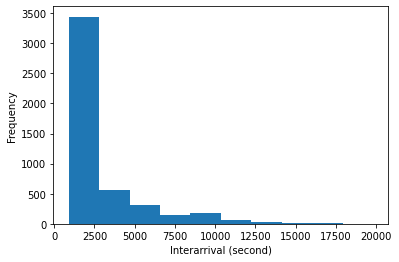

In [ ]:
all_interarrivals = []
for filename in result_dict:
  all_interarrivals = [*all_interarrivals, *result_dict[filename]["interarrivals"]]

all_interarrivals = filter_interarrivals(all_interarrivals, 0,20000)

kstest_result = do_kstest(all_interarrivals)
observed_values, bin_edges = plot_hist_for_interarrivals(all_interarrivals)
chisquare_test_result = do_chisquare_test(all_interarrivals, observed_values, bin_edges, is_merge=True)

kstest_result, chisquare_test_result

In [ ]:
# Save interarrivals to csv
interarrivals = interarrival_calculate(df_dict_merged['r209n20.gzip'])
df_interarrivals = pd.DataFrame({'Interarrivals (in s)': interarrivals}, columns=['Interarrivals (in s)']) 
df_interarrivals.to_csv(r'interarrivals.csv', index = False, header=True) 
pd.DataFrame.describe(df_interarrivals)

,Interarrivals (in s)
count,1.250000e+02
mean,8.857440e+04
std,5.378974e+05
min,9.000000e+02
25%,9.000000e+02
50%,2.700000e+03
75%,4.500000e+03
max,5.668200e+06


## 1.4. Autocorrelation

In [ ]:
def autocorrelation_generator(df, start_date, end_date, maxlags, value=False, plot=False):
  # Find autocorrelation between a given date of a df and with maxlags
  data = filter_df_by_time(df, start_date, end_date)
  interval = interarrival_calculate(merge_consecutive_rows(data))
  if interval == []:
    return f"No anomaly between {start_date} and {end_date}"
  if value:
    return autocorrelation_value(interval, maxlags, plot)
  else:
    return autocorrelation(interval, maxlags)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

def autocorrelation(data, maxlag):
  # Time series data
  data = pd.DataFrame(data)

  # Plot autocorrelation
  plot_acf(data, lags=maxlag)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def autocorrelation_value(data, maxlag, plot):
  # Time series data
  data = pd.Series(data)

  # Plot autocorrelation
  # Creating Autocorrelation plot
  if plot:
    x = pd.plotting.autocorrelation_plot(data)
      
    # ploting the Curve
    x.plot()
      
    # Display
    plt.show()
  return data.autocorr(lag=maxlag)

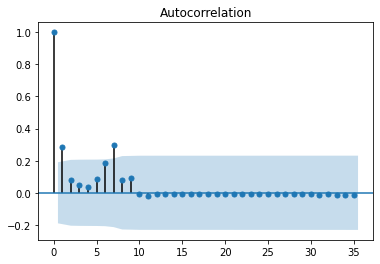

In [ ]:
autocorrelation_generator(df_dict['r207n02.gzip'], "2020-06-01", "2021-04-27", 35)

## 1.5. Poisson Analysis

In [ ]:
# Get number of event in the fixed time with given interval length (unit is 15 min)
def get_number_of_event_in_fixed_time(df_merged, wanted_interval_length):
  matrix = df_merged.to_numpy()
  events_count = []

  interval_length = wanted_interval_length
  count = 0
  for i, row in enumerate(matrix):
    length = row[-1]
    label = row[0]

    if label == 2:
      count += 1
    
    interval_length -= length

    if interval_length < 0:
      interval_length = wanted_interval_length + interval_length
      events_count.append(count)
      count = 0

  if interval_length > 0:
    events_count.append(count)
    
  return events_count

In [ ]:
interval_length = 96
df = filter_df_by_time(df_dict[filename], '2020-06-01 00:00:00', '2021-04-01 04:00:00')
df_merged = merge_consecutive_rows(df)
events_count = get_number_of_event_in_fixed_time(df_merged, interval_length)
print(events_count)
print(len(df_merged[df_merged["New_label"] == 2].to_numpy()))

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
11


(KstestResult(statistic=0.33646616541353386, pvalue=3.2222838748064937e-54),
 Power_divergenceResult(statistic=131.94613194556152, pvalue=1.4933502356634444e-27))

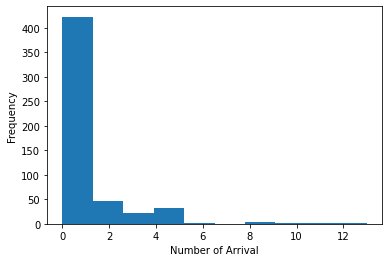

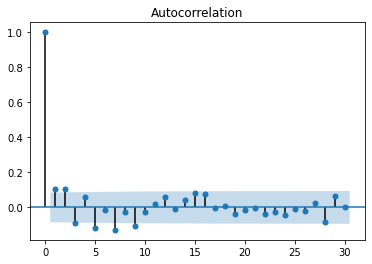

In [ ]:
all_events_count = []
interval_length = 96*7

for filename in df_dict:
  df = filter_df_by_time(df_dict[filename], '2020-06-01 00:00:00', '2021-04-01 04:00:00')
  df_merged = merge_consecutive_rows(df)
  events_count = get_number_of_event_in_fixed_time(df_merged, interval_length)
  all_events_count = [*all_events_count, *events_count]

filtered_all_events_count = [x for x in all_events_count if x < 14]

kstest_result = do_kstest(filtered_all_events_count)
observed_values, bin_edges, _ = plt.hist(filtered_all_events_count)
plt.xlabel('Number of Arrival')
plt.ylabel('Frequency')
chisquare_test_result = do_chisquare_test(filtered_all_events_count, observed_values, bin_edges, is_merge=True)
autocorrelation(filtered_all_events_count, 30)

kstest_result, chisquare_test_result

In [ ]:
pd.DataFrame(all_events_count, columns=["Number of Arrival in Fixed Time (1 week) for 50 Machines"]).describe()

,Number of Arrival in Fixed Time (1 week) for 50 Machines
count,534.000000
mean,1.260300
std,2.418975
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,42.000000


# 2. Output Analysis

In [ ]:
df = df_dict['r207n02.gzip']
df_merged = merge_consecutive_rows(df, mode='detailed')
label_0 = df_merged[df_merged["New_label"] == 0]
label_2 = df_merged[df_merged["New_label"] == 2]

In [ ]:
# Confidence Interval - Relative Output Analysis
# Independent Sampling Approach
def calculate_confidence_interval(first_row, first_coff, second_row, second_coff, alpha=0.05):
  mu_1 = calculate_mean(first_row, first_coff)
  mu_2 = calculate_mean(second_row, second_coff)
  var_1 = calculate_variance(first_row, mu_1)
  var_2 = calculate_variance(second_row, mu_2)
  n_1 = len(first_row)
  n_2 = len(second_row)

  diff_mean = mu_1 - mu_2
  diff_se = np.sqrt(var_1/n_1 + var_2/n_2)
  dof = ((var_1/n_1 + var_2/n_2)**2)/(((var_1/n_1)**2)/(n_1-1) + ((var_2/n_2)**2)/(n_2-1))
  
  t_value = stats.t.ppf(1-alpha/2, dof)

  half_width = diff_se * t_value

  return mu_1, mu_2, np.sqrt(var_1), np.sqrt(var_2), diff_mean, half_width


def calculate_mean(array, coefficients):
  return np.sum(np.multiply(array, coefficients))/np.sum(coefficients)
def calculate_variance(array, mean):
  # return calculate_mean(np.power(array, 2), coefficients) - np.power(mean, 2)
  return np.sum(np.power(np.subtract(array, mean), 2)) / (len(array)-1)

In [ ]:
result = {}
cols = [col for col in df.columns if not ("timestamp" in col or "label" in col)]

coff_label_0 = label_0["interval_length"]
coff_label_2 = label_2["interval_length"]
label_0_filtered = label_0[cols]
label_2_filtered = label_2[cols]
for col in label_0_filtered:
  result[col] = calculate_confidence_interval(label_0_filtered[col], coff_label_0, label_2_filtered[col], coff_label_2, 0.0001)
df_confidence = pd.DataFrame(result, index=["Mean of Label 0", "Mean of Label 2", "Standart Deviation of Label 0", "Standart Deviation of Label 2", "Difference of Means", "Half Width"])
print(len(result))
df_confidence

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


460


,avg:ambient,var:ambient,max:ambient,min:ambient,avg:dimm0_temp,var:dimm0_temp,max:dimm0_temp,min:dimm0_temp,avg:dimm10_temp,var:dimm10_temp,max:dimm10_temp,min:dimm10_temp,avg:dimm11_temp,var:dimm11_temp,max:dimm11_temp,min:dimm11_temp,avg:dimm12_temp,var:dimm12_temp,max:dimm12_temp,min:dimm12_temp,avg:dimm13_temp,var:dimm13_temp,max:dimm13_temp,min:dimm13_temp,avg:dimm14_temp,var:dimm14_temp,max:dimm14_temp,min:dimm14_temp,avg:dimm15_temp,var:dimm15_temp,max:dimm15_temp,min:dimm15_temp,avg:dimm1_temp,var:dimm1_temp,max:dimm1_temp,min:dimm1_temp,avg:dimm2_temp,var:dimm2_temp,max:dimm2_temp,min:dimm2_temp,...,avg:mem_free,var:mem_free,max:mem_free,min:mem_free,avg:mem_shared,var:mem_shared,max:mem_shared,min:mem_shared,avg:mem_total,var:mem_total,max:mem_total,min:mem_total,avg:part_max_used,var:part_max_used,max:part_max_used,min:part_max_used,avg:pkts_in,var:pkts_in,max:pkts_in,min:pkts_in,avg:pkts_out,var:pkts_out,max:pkts_out,min:pkts_out,avg:proc_run,var:proc_run,max:proc_run,min:proc_run,avg:proc_total,var:proc_total,max:proc_total,min:proc_total,avg:swap_free,var:swap_free,max:swap_free,min:swap_free,avg:swap_total,var:swap_total,max:swap_total,min:swap_total
Mean of Label 0,19.856986,0.036055,20.050921,19.661134,28.652489,0.064511,28.814171,28.488256,28.742792,0.065936,28.907540,28.579743,27.791985,0.062237,27.947963,27.631780,30.310713,0.055704,30.445627,30.173566,32.886447,0.055710,33.019855,32.751752,29.273261,0.055001,29.415261,29.133857,32.083712,0.060845,32.225733,31.938035,28.841894,0.064659,29.003179,28.678822,29.129704,0.069828,29.305541,28.953543,...,2.622560e+08,1.156503e+14,2.666338e+08,2.590033e+08,0.0,0.0,0.0,0.0,3.298729e+08,0.0,3.298729e+08,3.298729e+08,30.547074,0.0,30.547074,30.547074,130.664412,7347.552556,158.131834,111.428931,95.920711,13274.618366,127.150719,75.325237,27.896607,1213.022004,33.564690,22.351479,2635.182452,4254.313360,2643.398910,2625.770828,3.552883e+06,2.283814e+09,3.555389e+06,3.550731e+06,4194240.0,0.0,4194240.0,4194240.0
Mean of Label 2,19.305457,0.039413,19.510476,19.099048,27.229206,0.051036,27.368254,27.101587,27.524868,0.064248,27.669841,27.361905,26.767460,0.062308,26.923810,26.634921,28.902434,0.052094,29.022222,28.771429,31.346878,0.047982,31.457143,31.228571,27.917249,0.042721,28.015873,27.803175,30.520635,0.050340,30.622222,30.431746,27.504127,0.062343,27.650794,27.358730,27.645291,0.056206,27.780952,27.501587,...,2.851046e+08,1.041259e+13,2.860473e+08,2.844452e+08,0.0,0.0,0.0,0.0,3.298726e+08,0.0,3.298726e+08,3.298726e+08,32.412381,0.0,32.412381,32.412381,125.206596,67212.756392,155.096540,102.169206,82.454992,66884.047422,113.941333,59.640635,10.401058,98.628042,12.682540,7.317460,2094.305026,274.038360,2098.733333,2089.765079,3.516334e+06,1.269376e+04,3.516344e+06,3.516330e+06,4194240.0,0.0,4194240.0,4194240.0
Standart Deviation of Label 0,1.912759,0.111855,1.932997,1.883157,1.787181,0.129092,1.814671,1.805034,1.879014,0.096966,1.928131,1.831725,1.838991,0.098247,1.854698,1.824834,1.936580,0.081786,2.006204,1.845053,2.101825,0.096384,2.178097,2.016429,1.780499,0.077486,1.806689,1.766776,2.083642,0.100353,2.172457,2.010547,1.774211,0.107799,1.805358,1.780288,1.803607,0.111894,1.851480,1.781041,...,3.771946e+07,1.375075e+14,3.685266e+07,3.868342e+07,0.0,0.0,0.0,0.0,9.833296e+02,0.0,9.833296e+02,9.833296e+02,6.361295,0.0,6.361295,6.361295,103.574332,24926.097670,140.031113,90.806968,64.354746,204792.555988,204.619731,19.235797,23.620671,1231.197029,29.253899,19.235661,271.996072,4164.767766,273.822881,269.106913,3.296218e+05,2.934298e+09,3.302836e+05,3.290165e+05,0.0,0.0,0.0,0.0
Standart Deviation of Label 2,2.174965,0.136481,2.205554,2.158452,2.462982,0.144915,2.479678,2.432269,2.287620,0.182300,2.367747,2.216455,2.227904,0.161405,2.316806,2.221270,2.415414,0.186061,2.483609,2.343962,2.668997,0.181698,2.778867,2.566985,2.180431,0.141630,2.224506,2.136074,2.682874,0.221222,2.803204,2.601156,2.443170,0.169183,2.493339,2.451434,2.564509,0.144581,2.622165,2.534511,...,5.0

In [ ]:
filtered_cols = []
for col in df_confidence:
  mean = df_confidence[col].loc["Difference of Means"]
  hw = df_confidence[col].loc["Half Width"]
  if np.abs(mean) > np.abs(hw)*2:
    filtered_cols.append(col)
print(len(filtered_cols))
df_confidence[filtered_cols]

38


,max:p0_core12_temp,min:p0_core12_temp,avg:p0_core13_temp,max:p0_core13_temp,min:p0_core13_temp,avg:p0_core16_temp,max:p0_core16_temp,min:p0_core16_temp,avg:p0_core17_temp,max:p0_core17_temp,min:p0_core17_temp,avg:p0_core18_temp,max:p0_core18_temp,min:p0_core18_temp,avg:p0_core19_temp,min:p0_core19_temp,min:p0_core22_temp,min:p0_core23_temp,avg:p0_core2_temp,max:p0_core2_temp,max:p0_core3_temp,max:p0_core4_temp,max:p0_power,avg:p0_vdd_temp,max:p0_vdd_temp,min:p1_core5_temp,avg:ps0_output_volta,min:ps0_output_volta,avg:ps1_output_volta,min:ps1_output_volta,var:load_fifteen,var:load_five,var:load_one,var:proc_run,avg:proc_total,max:proc_total,min:proc_total,var:swap_free
Mean of Label 0,46.723008,42.700558,42.902664,44.624968,41.250130,43.481056,45.528809,41.541331,43.595976,45.607903,41.633662,43.193248,44.992603,41.411627,43.645880,41.647223,41.271152,41.426486,45.577389,47.655204,47.518622,48.984557,102.665455,34.293636,34.888334,43.448157,12.224753,12.215112,12.224786,12.215157,28.215034,144.763051,633.579351,1213.022004,2635.182452,2643.398910,2625.770828,2.283814e+09
Mean of Label 2,36.361905,34.171429,34.549350,35.447619,33.546032,34.634497,35.987302,33.419048,34.716470,35.920635,33.507937,34.488587,35.457143,33.406349,34.792570,33.409524,33.415873,33.514286,35.895790,36.876190,36.838095,38.165079,51.815873,29.912804,30.206349,36.415873,12.325661,12.320000,12.325778,12.320000,0.289675,1.728643,13.603451,98.628042,2094.305026,2098.733333,2089.765079,1.269376e+04
Standart Deviation of Label 0,8.191491,6.551023,6.518244,7.158137,5.787552,7.168776,7.780247,6.152787,7.459194,8.197614,6.304241,7.048338,7.912131,6.127431,7.276034,6.254775,6.021724,6.191123,7.079425,7.262682,7.856865,7.489048,42.637044,3.315344,3.532615,6.377548,0.054281,0.038943,0.053315,0.038891,28.152742,144.787631,631.695364,1231.197029,271.996072,273.822881,269.106913,2.934298e+09
Standart Deviation of Label 2,10.407325,8.485513,8.205043,8.732311,7.432937,8.547597,9.539372,7.484222,8.842820,9.556599,7.639822,8.331446,8.965798,7.465320,8.906071,7.570761,7.619760,7.723143,10.395374,10.803029,10.909442,11.902383,50.037161,4.687664,4.866334,6.681042,0.113340,0.113942,0.113671,0.113942,2.307588,15.288207,85.179718,519.918400,392.581890,392.419773,390.941887,3.833668e+05
Difference of Means,10.361103,8.529129,8.353314,9.177349,7.704098,8.846558,9.541507,8.122284,8.879506,9.687268,8.125726,8.704661,9.535460,8.005278,8.853310,8.237699,7.855279,7.912200,9.681599,10.779013,10.680527,10.819478,50.849582,4.380831,4.681985,7.032284,-0.100909,-0.104888,-0.100992,-0.104843,27.925359,143.034408,619.975900,1114.393962,540.877426,544.665577,536.005749,2.283801e+09
Half Width,5.034521,4.075659,3.983046,4.290733,3.581276,4.238622,4.677972,3.681672,4.395331,4.783200,3.763803,4.146105,4.542019,3.670047,4.370313,3.731568,3.691636,3.762049,4.788030,4.956440,5.114872,5.358920,24.974924,2.184833,2.287604,3.507431,0.048077,0.046272,0.048048,0.046266,10.927366,56.303728,246.375317,512.211145,181.783512,182.114752,180.658775,1.135707e+09


In [ ]:
df_confidence.to_excel("statistics.xlsx")